# Tasks for laboratory assignment 1

In [2]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [3]:
def parse_web_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  
        soup = BeautifulSoup(response.text, 'html.parser') 
        return soup.get_text(separator=' ', strip=True) 
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}') 
    except Exception as err:
        print(f'Other error occurred: {err}') 
    return None  

# Example usage
print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

Головна - Факультет математики та інформатики Перейти до основного вмісту [email protected] 58012, Україна, м. Чернівці, вул. Університетська, 28 Новини Всі Загальні Оголошення Події Студенту Викладачу Вітання Діяльність Наукова Навчально-методична Міжнар
Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Contribute Help Learn to edit Community portal Recent changes Upload file Search Searc


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [4]:
def parse_api(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()  

        with open('result.json', 'w') as json_file:
            json.dump(response.json(), json_file, indent=4) 

        print("Data successfully saved to result.json.")
    
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}') 

# Example usage
parse_api('https://api.github.com/')

Data successfully saved to result.json.


## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [5]:
def parse_json(date):
    try:
        with open('resources/weather.json', 'r') as json_file:
            weather_data = json.load(json_file)  
        
        daily_weather = weather_data.get('daily', [])
        
        result = [entry for entry in daily_weather if isinstance(entry, dict) and entry.get('date') == date]

        return result  

    except FileNotFoundError:
        print("The file 'weather.json' was not found.")
    except json.JSONDecodeError:
        print("Error decoding JSON from the file.")
    except Exception as err:
        print(f'An error occurred: {err}')

    return [] 

# Example usage
target_date = '2024-08-19'  # Use 'YYYY-MM-DD' format
print(parse_json(target_date))

[{'date': '2024-08-19', 'max_temperature': 30.0, 'min_temperature': 21.0, 'precipitation': 5.0, 'wind_speed': 10.0, 'humidity': 70, 'weather_description': 'Light rain'}]


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [6]:
def parse_csv(date):
    try:
        df = pd.read_csv('resources/weather.csv', parse_dates=['CET'])
        
        weather_data = df[df['CET'] == date]
        
        if weather_data.empty:
            print(f"No weather data found for {date}.")
            return []
        
        return weather_data.to_dict(orient='records')

    except FileNotFoundError:
        print("The file 'weather.csv' was not found.")
    except Exception as err:
        print(f'An error occurred: {err}')

    return []  

# Example usage
target_date = '1997-05-22'  
print(parse_csv(target_date))

[{'CET': Timestamp('1997-05-22 00:00:00'), 'Max TemperatureC': 25.0, 'Mean TemperatureC': 18.0, 'Min TemperatureC': 10.0, 'Dew PointC': 11.0, 'MeanDew PointC': 8.0, 'Min DewpointC': 6.0, 'Max Humidity': 88.0, ' Mean Humidity': 54.0, ' Min Humidity': 34.0, ' Max Sea Level PressurehPa': 1017, ' Mean Sea Level PressurehPa': 1015, ' Min Sea Level PressurehPa': 1012, ' Max VisibilityKm': 10.0, ' Mean VisibilityKm': 10.0, ' Min VisibilitykM': 10.0, ' Max Wind SpeedKm/h': 11, ' Mean Wind SpeedKm/h': 3, ' Max Gust SpeedKm/h': nan, 'Precipitationmm': 0.0, ' CloudCover': 3.0, ' Events': nan, 'WindDirDegrees': 277}]


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

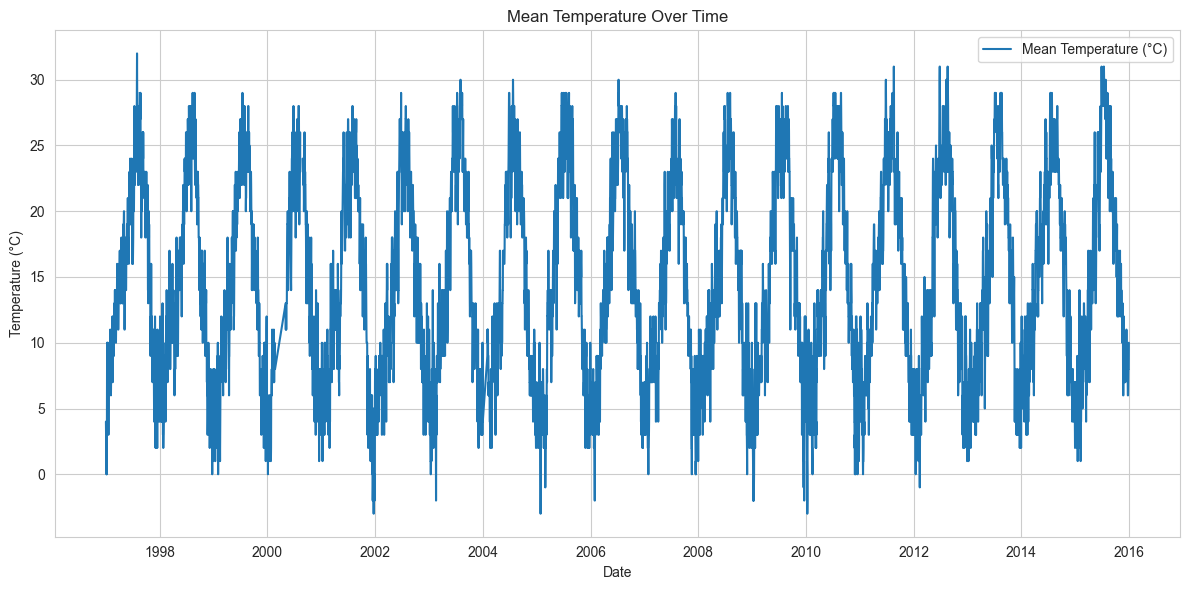

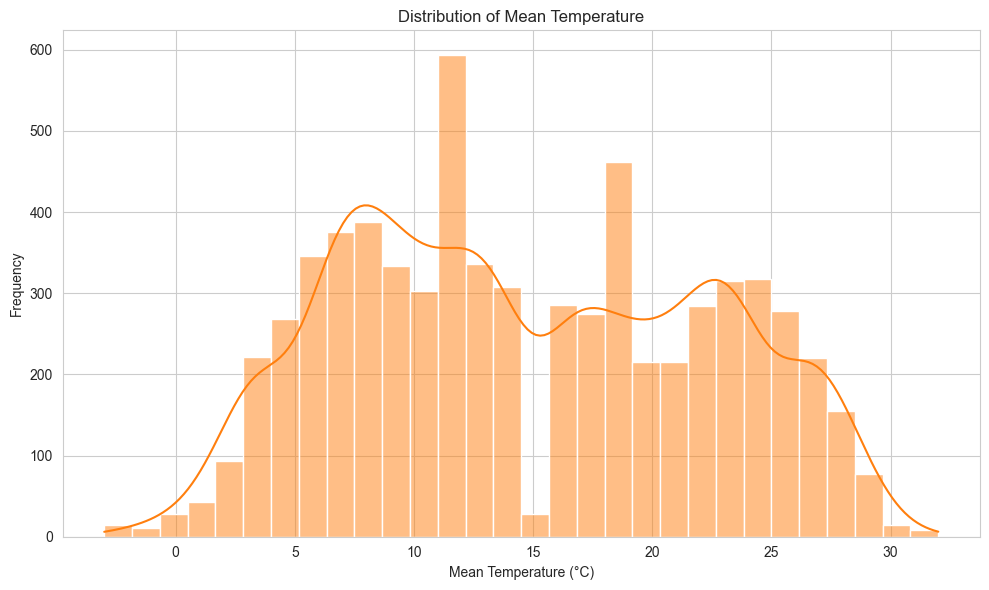

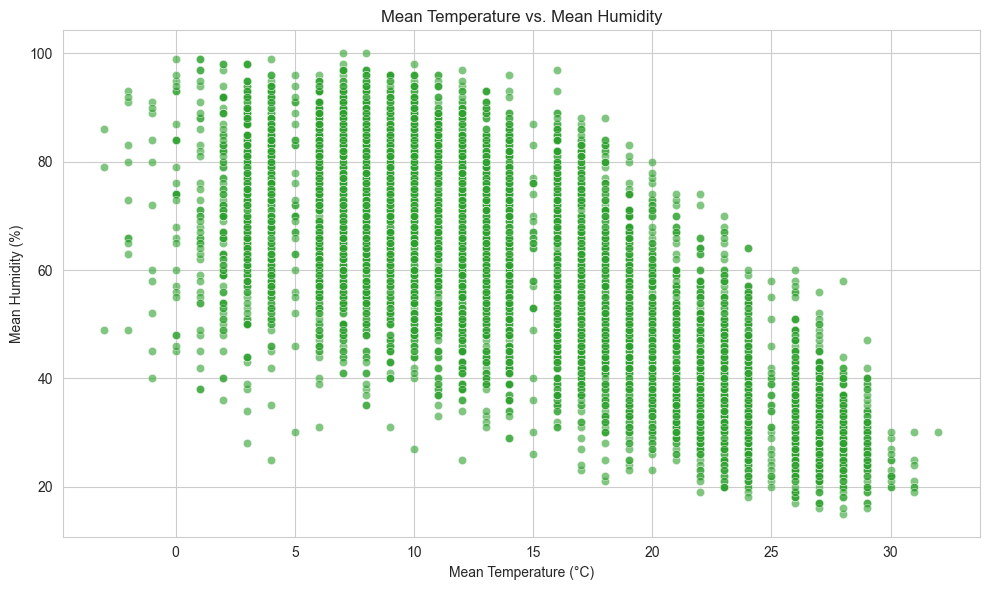

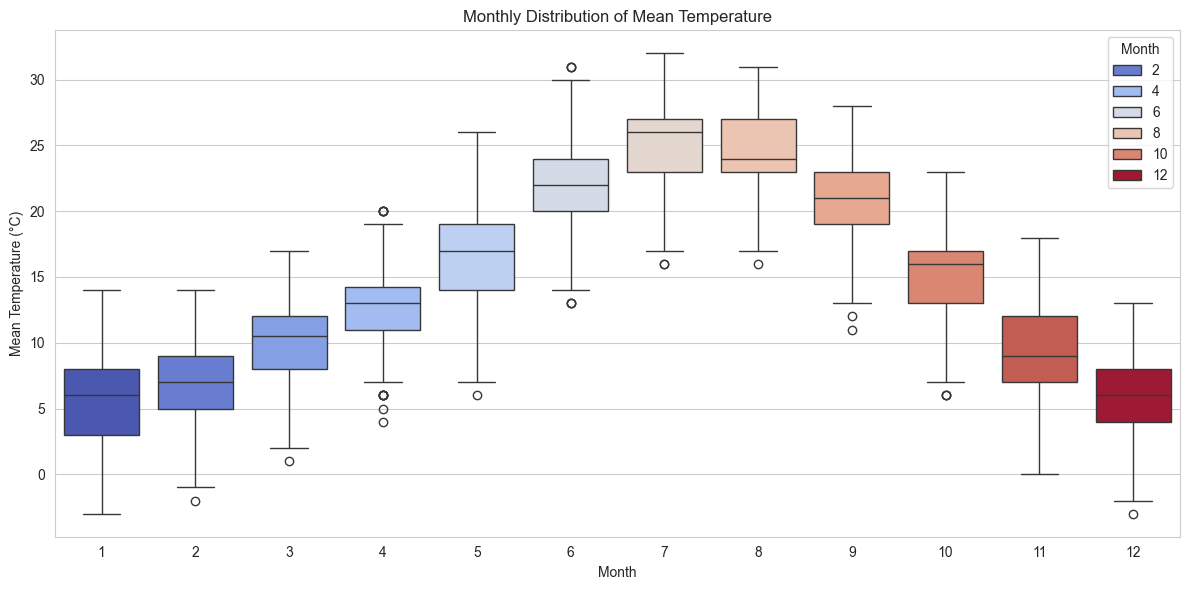

In [10]:
import seaborn as sns

def visualize_data():
    weather_data = pd.read_csv('resources/weather.csv', parse_dates=['CET'])
    
    sns.set_style("whitegrid")

    plt.figure(figsize=(12, 6))
    plt.plot(weather_data['CET'], weather_data['Mean TemperatureC'], label='Mean Temperature (°C)', color='tab:blue')
    plt.title('Mean Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.tight_layout()
    plt.savefig('line_plot_temperature.png')
    plt.savefig('line_plot_temperature.webp')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(weather_data['Mean TemperatureC'].dropna(), bins=30, kde=True, color='tab:orange')
    plt.title('Distribution of Mean Temperature')
    plt.xlabel('Mean Temperature (°C)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig('histogram_temperature.png')
    plt.savefig('histogram_temperature.webp')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Mean TemperatureC', y=' Mean Humidity', data=weather_data, alpha=0.6, color='tab:green')
    plt.title('Mean Temperature vs. Mean Humidity')
    plt.xlabel('Mean Temperature (°C)')
    plt.ylabel('Mean Humidity (%)')
    plt.tight_layout()
    plt.savefig('scatter_temperature_humidity.png')
    plt.savefig('scatter_temperature_humidity.webp')
    plt.show()

    weather_data['Month'] = weather_data['CET'].dt.month
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Month', y='Mean TemperatureC', data=weather_data, hue='Month', palette='coolwarm', dodge=False)
    plt.title('Monthly Distribution of Mean Temperature')
    plt.xlabel('Month')
    plt.ylabel('Mean Temperature (°C)')
    plt.tight_layout()
    plt.savefig('boxplot_monthly_temperature.png')
    plt.savefig('boxplot_monthly_temperature.webp')
    plt.show()

# Example usage
visualize_data()